In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), 'build'))
import terraingen as tg
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 10

# size is the width of a hex, so 2*a (where a is thelattice constant)
h = 0.5*np.sqrt(3)        # half of hex height in a
n_x = size                # num hexes in x
n_y = np.floor(size/h)    # num hexes in y

# map hex ids for a square map
m_x = np.arange(0,n_x).astype(np.int32)
m_y = np.arange(0,n_y).astype(np.int32)

# real space coords
r_temp_x = np.linspace(0,size,size, endpoint=False).astype(np.float32)
r_temp_y = np.linspace(0,size,size, endpoint=False).astype(np.float32)
r_x, r_y = np.meshgrid(r_temp_x, r_temp_y)
# print(r_y)
r_y[:,1::2] += h   # y of every other column is shifted by h
# print(r_y)
r_x=r_x.flatten()
r_y=r_y.flatten()

print(r_x.shape, r_y.shape)
print(r_x)
print(r_y)

(100,) (100,)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3.
 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5. 6. 7.
 8. 9. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1.
 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5.
 6. 7. 8. 9.]
[0.        0.8660254 0.        0.8660254 0.        0.8660254 0.
 0.8660254 0.        0.8660254 1.        1.8660254 1.        1.8660254
 1.        1.8660254 1.        1.8660254 1.        1.8660254 2.
 2.8660254 2.        2.8660254 2.        2.8660254 2.        2.8660254
 2.        2.8660254 3.        3.8660254 3.        3.8660254 3.
 3.8660254 3.        3.8660254 3.        3.8660254 4.        4.8660254
 4.        4.8660254 4.        4.8660254 4.        4.8660254 4.
 4.8660254 5.        5.8660254 5.        5.8660254 5.        5.8660254
 5.        5.8660254 5.        5.8660254 6.        6.8660254 6.
 6.8660254 6.        6.8660254 6.        6.8660254 6.        6.8660254
 7.  

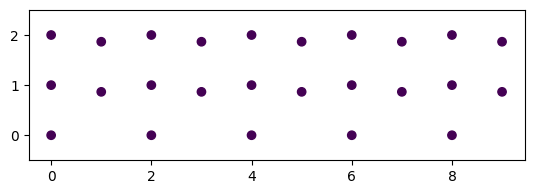

[1 1 1 1 1 1 1 1 1 1]


In [3]:
import importlib
importlib.reload(tg)

gen=tg.Generator()
gen.setSeed(444)
gen.setFreq(0.003*512/size)

# Island
v = gen.getTerrain(r_x, r_y, int(0), float(size), False)
# print(v)

plt.scatter(r_x, r_y, c=v)
plt.gca().set_aspect('equal', 'box')
plt.ylim([0-0.5,2.5])
plt.show()

print(v[:10])

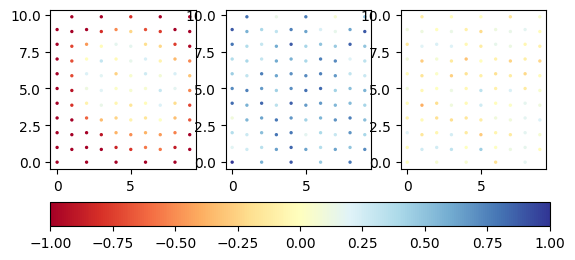

In [4]:
# Island
v = gen.getTerrain(r_x, r_y, int(0), float(size), True)
# print(v)

for i in range(3):
    plt.subplot(2,3,i+1)
    plt.gca().set_aspect('equal', 'box')
    sc = plt.scatter(r_x, r_y, c=v[i], vmin=-1, vmax=1,
                     s=2, cmap='RdYlBu')

plt.subplot(2,3,5)
img = plt.imshow(np.array([[-1,1]]), cmap="RdYlBu")
plt.gca().set_visible(False)
cax = plt.axes([0.125, 0.42, 0.78, 0.05])
plt.colorbar(orientation="horizontal", cax=cax)

plt.show()

# How r_x is actually done

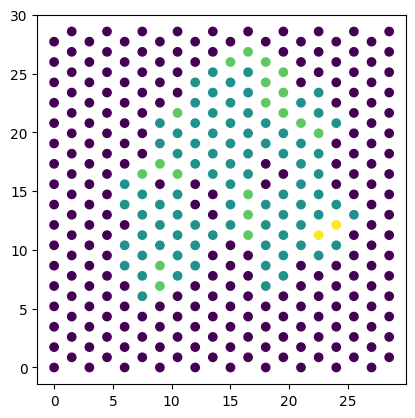

In [43]:
size=20                    # number of horizontal hexes

a = 1                # a is half of hex width, or 3/2 of step between hexes
h = 0.5*np.sqrt(3)*a       # half of hex height
n_x = int(np.floor(size))  # num hexes in x; horizontal step to next hex is 1.5*a
n_y = int(np.floor(0.75*a*size/h))     # num hexes in y

# map hex ids for a square map
m_x = np.arange(0,n_x).astype(np.int32)
m_y = np.arange(0,n_y).astype(np.int32)
m_x, m_y = np.meshgrid(m_x, m_y)
m_x=m_x.flatten()
m_y=m_y.flatten()

# real space coords
r_temp_x = np.linspace(0,size*1.5*a, n_x, endpoint=False).astype(np.float32)
r_temp_y = np.linspace(0,n_y*2*h,   n_y, endpoint=False).astype(np.float32)
r_x, r_y = np.meshgrid(r_temp_x, r_temp_y)
# r_x = 1.5*a*m_x.astype(np.float32)
# r_y = 2*h * m_y.astype(np.float32)
r_y[:, 1::2] += h   # y of every other column is shifted by h

#ensure 1D arrays
r_x=r_x.flatten()
r_y=r_y.flatten()



gen=tg.Generator()
gen.setSeed(445)
gen.setFreq(0.003*512/(size*1.5*a))

# Island
v = gen.getTerrain(r_x, r_y, int(0), float(size*1.5*a), False)


plt.scatter(r_x, r_y, c=v)
plt.gca().set_aspect('equal', 'box')
# plt.ylim([0-0.5,2.5])
plt.show()

In [6]:
# print(r_y)